<a href="https://colab.research.google.com/github/a-forty-two/cog_may_onwards_21/blob/main/Cog_tf_005_conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
from tensorflow import keras

In [14]:
!ls

123.jpg  sample_data


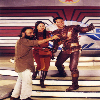

In [15]:
import cv2
from google.colab.patches import cv2_imshow
data = cv2.imread('123.jpg')
data = cv2.resize(data, (100,100))
cv2_imshow(data)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



Using TensorFlow backend.


553467904/553467096 [==============================] - 7s 0us/step


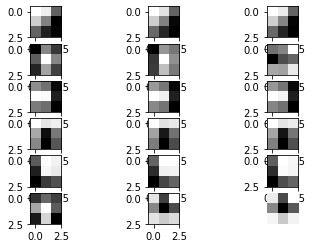

In [16]:
import tensorflow as tf # open source library for scientific methods and vector math 
from tensorflow import keras
from keras.models import Model 
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
model = VGG16() 
kernels, biases = model.layers[1].get_weights()
fmin, fmax = kernels.min(), kernels.max()
filters_norm = (kernels-fmin)/(fmax - fmin) # Zscore, MinMax normalizing 
n_filters, ix=6,1 

for i in range(n_filters):
  f = kernels[:,:,:,i]
  for j in range(3):
    ax = plt.subplot(n_filters, 3, ix)
    plt.imshow(f[:,:,j], cmap='gray')
    ix = ix + 1

plt.axis('off')
plt.show()

In [17]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
model = Model(inputs=model.inputs, outputs=model.layers[1].output) # CHOPPED the previous VGG model and


In [18]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

img = load_img('123.jpg', target_size=(224,224)) # because it preserves the dimensions
# from image, convert to array of numbers to feed to NN
img = img_to_array(img) # this results in a a 2-D matrix array
img.shape

(224, 224, 3)

In [19]:
from numpy import expand_dims
from keras.applications.vgg16 import preprocess_input 
img = expand_dims(img, axis=0) # CREATES or REMOVES new dimensions into your data 
# previously img was (Width, Height, Depth)
# 1 more dimension to it-> SAMPLE_ID
# (SAMPLE_ID, W, H, D)
img = preprocess_input(img)
# prepares img to be used by VGG16
featureMaps = model.predict(img)

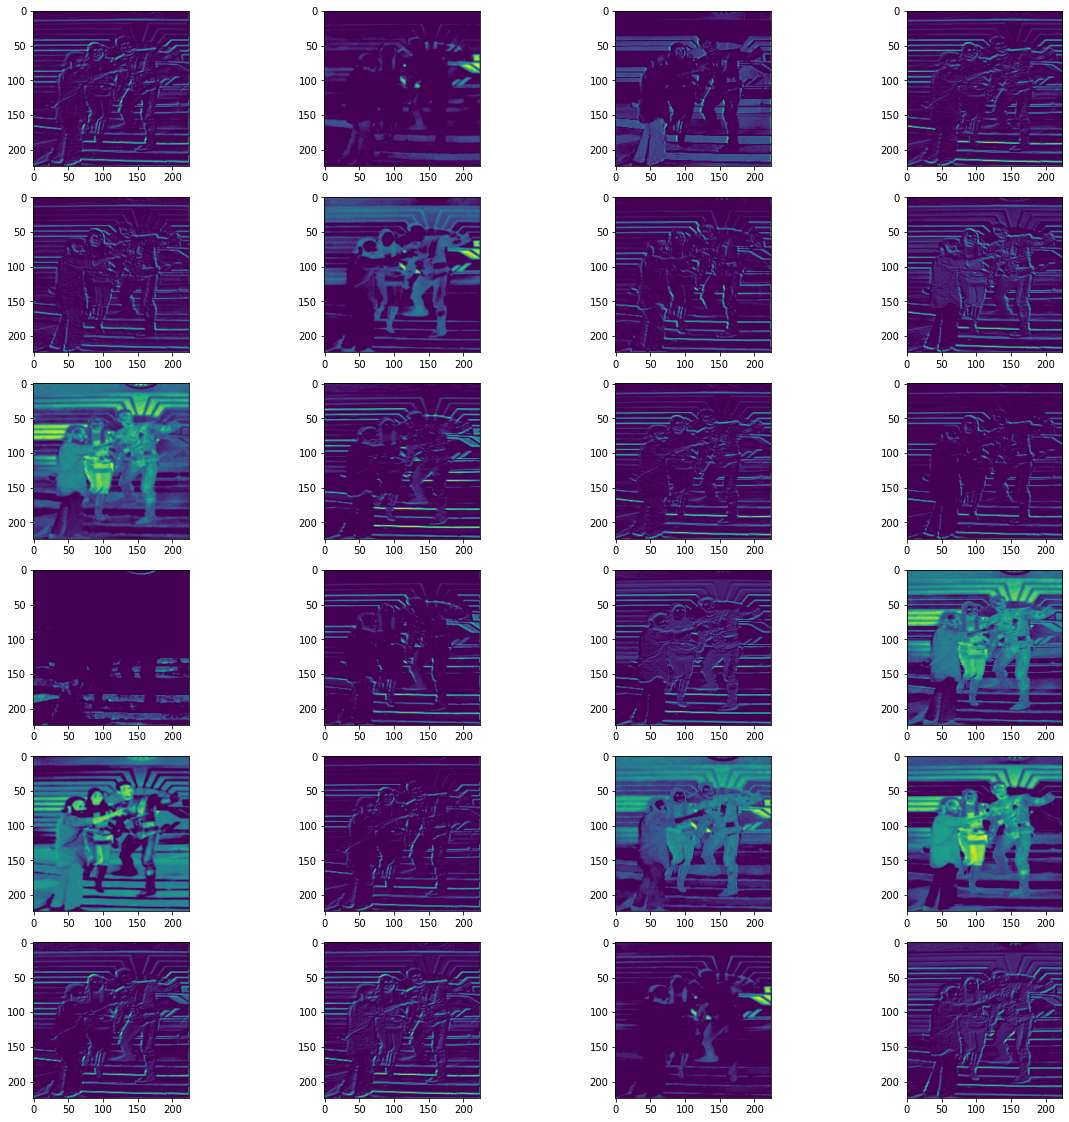

In [20]:
sz = 8
index = 1
plt.figure(figsize=(20,20))
for x in range(24):
  ax = plt.subplot(6,4,index)
  plt.imshow(featureMaps[0,:,:, index-1])
  index=index + 1
plt.show()

In [21]:
model.summary()
# [],[]

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [22]:
weights, biases = model.get_weights()

In [25]:
weights[0,0] # a 3X3 

array([[ 0.42947057,  0.11727387,  0.03401296,  0.35422093, -0.0865837 ,
         0.22968295,  0.06683242,  0.04133838,  0.13026784,  0.03291035,
         0.09615457, -0.09222532, -0.15587331,  0.0522968 , -0.08324417,
         0.15728769,  0.0291196 ,  0.05094835,  0.19055748, -0.04372229,
         0.3618031 ,  0.23902874,  0.16667192, -0.18046746,  0.04404821,
         0.09592837, -0.04381131, -0.1884835 , -0.04399502, -0.18985446,
        -0.23386982,  0.12836744, -0.11059975,  0.00571336, -0.24479656,
        -0.30530283,  0.060938  , -0.32816252,  0.1711953 ,  0.10265407,
        -0.11063665,  0.33012986, -0.05869728,  0.18478717,  0.01050853,
         0.10668027, -0.13086924, -0.36283946,  0.06440807,  0.09335972,
         0.00401619,  0.37814805,  0.05268804, -0.27078936,  0.11060741,
        -0.11819526,  0.04298935,  0.35323623, -0.28468162, -0.20289008,
        -0.284944  , -0.13224158, -0.05334752,  0.00757738],
       [ 0.55037946,  0.02087744,  0.09883115,  0.43703237, -0.

In [26]:
len(weights[0,0,0])

64